In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('seaborn-deep')

In [40]:
BASE_PATH = '../../initial_model'
BASE_PATH2 = '../../best_model'

In [41]:
df = pd.read_csv(f'{BASE_PATH2}/evaluation_results.csv', header=0, index_col=0)

In [63]:
df = pd.read_csv(f'{BASE_PATH}/evaluation_results.csv', header=0, index_col=0)

In [64]:
df

,rewards_per_run_RandomModel,episode_lenghts_RandomModel,rewards_per_run_SimpleCPUThresholdModel,episode_lenghts_SimpleCPUThresholdModel,rewards_per_run_DQN_MlpPolicy,episode_lenghts_DQN_MlpPolicy,rewards_per_run_DQN_CnnPolicy,episode_lenghts_DQN_CnnPolicy,rewards_per_run_PPO_MlpPolicy,episode_lenghts_PPO_MlpPolicy,rewards_per_run_PPO_CnnPolicy,episode_lenghts_PPO_CnnPolicy,rewards_per_run_RecurrentPPO_CnnLstmPolicy,episode_lenghts_RecurrentPPO_CnnLstmPolicy,rewards_per_run_RecurrentPPO_MlpLstmPolicy,episode_lenghts_RecurrentPPO_MlpLstmPolicy
0,-33.040232,241,-40.878282,440,-41.882741,465,-33.040232,241,-33.040232,241,-33.040232,241,-33.120078,243,-33.040232,241
1,-9.323747,241,-17.170223,456,-18.985326,500,-9.323747,241,-9.323747,241,-9.323747,241,-11.404985,294,-9.363695,242
2,-9.405382,241,-19.316783,500,-19.451056,500,-9.405382,241,-9.405382,241,-9.405382,241,-9.194954,241,-9.401412,241
3,-9.456981,241,-17.157023,440,-19.698053,500,-9.456981,241,-9.456981,241,-9.496935,242,-9.386024,243,-9.494432,242
4,-9.529899,242,-18.496156,471,-19.847658,500,-9.489943,241,-9.489943,241,-9.488136,241,-9.371098,241,-9.486345,241
5,-10.030147,254,-17.982775,456,-17.301487,435,-9.512542,241,-9.512542,241,-9.511131,241,-9.494277,243,-9.509731,241
6,-9.511569,241,-18.034625,456,-18.606111,467,-9.528938,241,-9.528938,241,-9.527783,241,-9.444675,241,-9.526635,241
7,-9.566465,242,-17.429342,440,-15.440325,388,-9.541356,241,-9.541356,241,-9.540379,241,-9.547528,243,-9.539407,241
8,-9.856613,249,-18.092032,456,-19.930698,500,-9.551079,241,-9.551079,241,-9.550233,241,-9.485103,241,-9.549391,241
9,-9.540851,241,-18.398712,463,-16.100412,404,-9.558896,241,-9.558896,241,-9.558150,241,-9.499730,241,-9.557408,241


In [65]:
eposide_len_cols = [col for col in df.columns if 'episode_lenghts' in col]
rewards_cols = [col for col in df.columns if 'rewards' in col]

In [66]:
episode_lengths = df[eposide_len_cols]
rewards = df[rewards_cols]

episode_lengths.columns = [col.replace('episode_lenghts_', '') for col in episode_lengths.columns]
rewards.columns = [col.replace('rewards_per_run_', '') for col in rewards.columns]

In [67]:
rewards

,RandomModel,SimpleCPUThresholdModel,DQN_MlpPolicy,DQN_CnnPolicy,PPO_MlpPolicy,PPO_CnnPolicy,RecurrentPPO_CnnLstmPolicy,RecurrentPPO_MlpLstmPolicy
0,-33.040232,-40.878282,-41.882741,-33.040232,-33.040232,-33.040232,-33.120078,-33.040232
1,-9.323747,-17.170223,-18.985326,-9.323747,-9.323747,-9.323747,-11.404985,-9.363695
2,-9.405382,-19.316783,-19.451056,-9.405382,-9.405382,-9.405382,-9.194954,-9.401412
3,-9.456981,-17.157023,-19.698053,-9.456981,-9.456981,-9.496935,-9.386024,-9.494432
4,-9.529899,-18.496156,-19.847658,-9.489943,-9.489943,-9.488136,-9.371098,-9.486345
5,-10.030147,-17.982775,-17.301487,-9.512542,-9.512542,-9.511131,-9.494277,-9.509731
6,-9.511569,-18.034625,-18.606111,-9.528938,-9.528938,-9.527783,-9.444675,-9.526635
7,-9.566465,-17.429342,-15.440325,-9.541356,-9.541356,-9.540379,-9.547528,-9.539407
8,-9.856613,-18.092032,-19.930698,-9.551079,-9.551079,-9.550233,-9.485103,-9.549391
9,-9.540851,-18.398712,-16.100412,-9.558896,-9.558896,-9.558150,-9.499730,-9.557408


In [68]:
mean_rewards = rewards.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_rewards)

,0
DQN_CnnPolicy,-11.840910
PPO_MlpPolicy,-11.840910
PPO_CnnPolicy,-11.844211
RecurrentPPO_MlpLstmPolicy,-11.846869
RandomModel,-11.926189
RecurrentPPO_CnnLstmPolicy,-11.994845
SimpleCPUThresholdModel,-20.295595
DQN_MlpPolicy,-20.724387


In [69]:
mean_rewards = mean_rewards.drop('RandomModel')
mean_rewards

DQN_CnnPolicy                -11.840910
PPO_MlpPolicy                -11.840910
PPO_CnnPolicy                -11.844211
RecurrentPPO_MlpLstmPolicy   -11.846869
RecurrentPPO_CnnLstmPolicy   -11.994845
SimpleCPUThresholdModel      -20.295595
DQN_MlpPolicy                -20.724387
dtype: float64

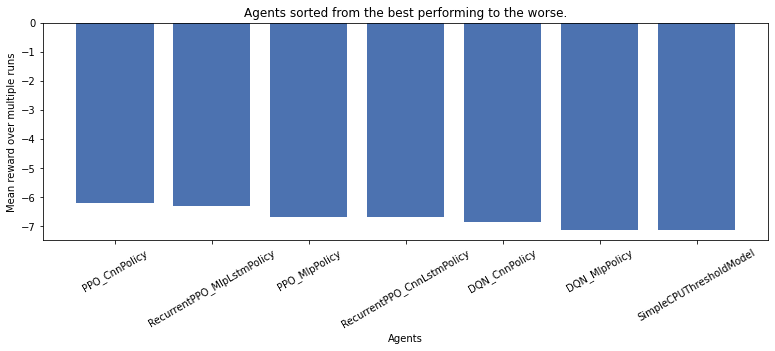

In [55]:
# CONTINOUS
plt.figure(figsize=(13, 4))
plt.bar(x=[x for x in range(len(mean_rewards.index))], height=mean_rewards)
plt.xticks(range(len(mean_rewards.index)), mean_rewards.index, rotation=30)
plt.xlabel('Agents')
plt.ylabel('Mean reward over multiple runs')
plt.title('Agents sorted from the best performing to the worse.')
plt.show()


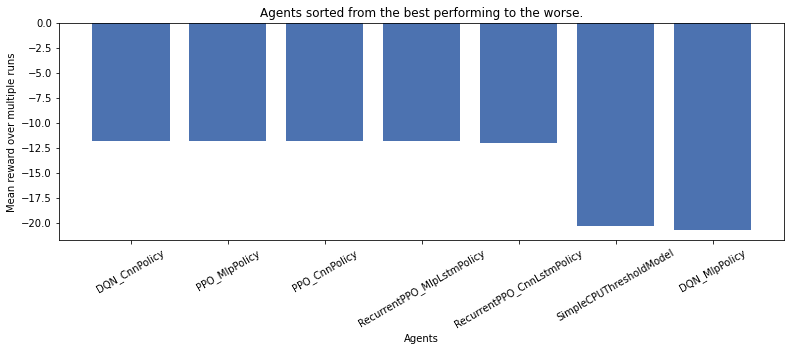

In [70]:
# SAMPLE
plt.figure(figsize=(13, 4))
plt.bar(x=[x for x in range(len(mean_rewards.index))], height=mean_rewards)
plt.xticks(range(len(mean_rewards.index)), mean_rewards.index, rotation=30)
plt.xlabel('Agents')
plt.ylabel('Mean reward over multiple runs')
plt.title('Agents sorted from the best performing to the worse.')
plt.show()


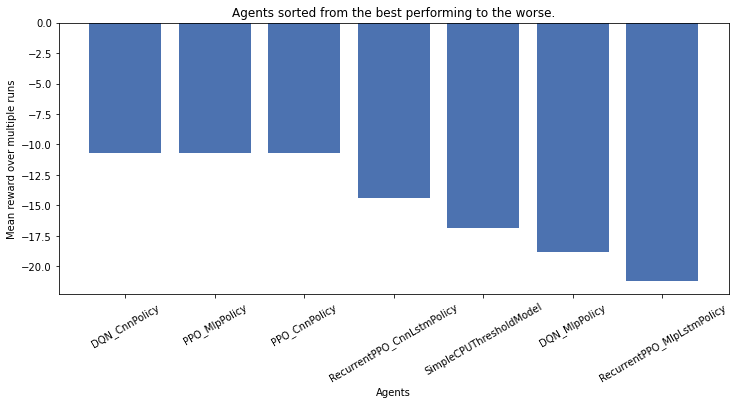

In [29]:
plt.figure(figsize=(12, 5))
plt.bar(x=[x for x in range(len(mean_rewards.index))], height=mean_rewards)
plt.xticks(range(len(mean_rewards.index)), mean_rewards.index, rotation=30)
plt.xlabel('Agents')
plt.ylabel('Mean reward over multiple runs')
plt.title('Agents sorted from the best performing to the worse.')
plt.show()


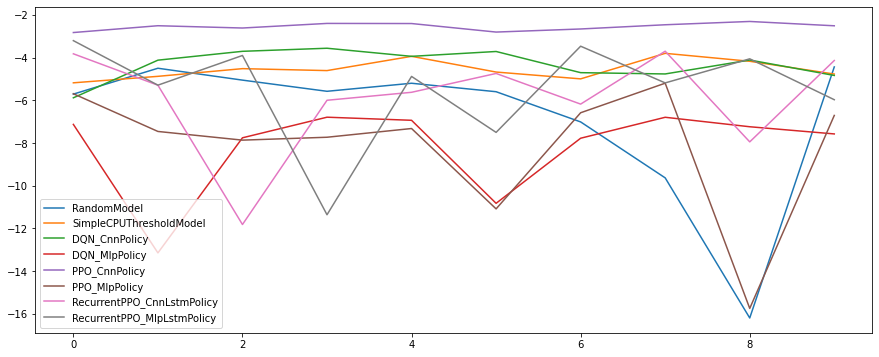

In [180]:
plt.figure(figsize=(15, 6))
plt.plot(rewards)
plt.legend(rewards.columns)
plt.show()

In [181]:
episode_lengths

,RandomModel,SimpleCPUThresholdModel,DQN_CnnPolicy,DQN_MlpPolicy,PPO_CnnPolicy,PPO_MlpPolicy,RecurrentPPO_CnnLstmPolicy,RecurrentPPO_MlpLstmPolicy
0,70,84,104,114,36,156,47,29
1,52,76,88,239,54,190,75,47
2,56,78,82,144,32,196,87,36
3,81,78,74,110,31,190,63,55
4,72,75,104,144,30,184,64,41
5,53,84,85,220,34,233,70,43
6,68,84,87,161,28,173,61,41
7,141,75,96,144,30,150,51,41
8,152,76,90,144,27,270,61,48
9,52,84,90,144,29,161,58,40


In [182]:
mean_episode_lengths = episode_lengths.mean(axis=0).sort_values(ascending=False)
pd.DataFrame(mean_episode_lengths)

,0
PPO_MlpPolicy,190.3
DQN_MlpPolicy,156.4
DQN_CnnPolicy,90.0
RandomModel,79.7
SimpleCPUThresholdModel,79.4
RecurrentPPO_CnnLstmPolicy,63.7
RecurrentPPO_MlpLstmPolicy,42.1
PPO_CnnPolicy,33.1


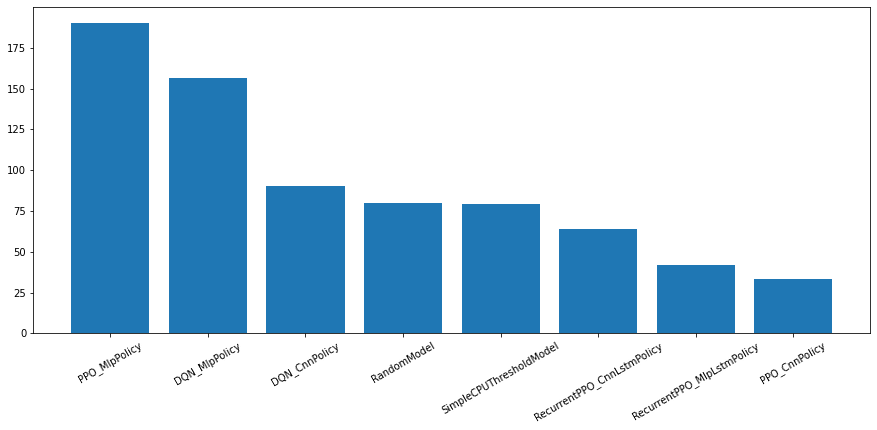

In [183]:
plt.figure(figsize=(15, 6))
plt.bar(x=[x for x in range(len(mean_episode_lengths.index))], height=mean_episode_lengths)
plt.xticks(range(len(mean_episode_lengths.index)), mean_episode_lengths.index, rotation=30)
plt.show()


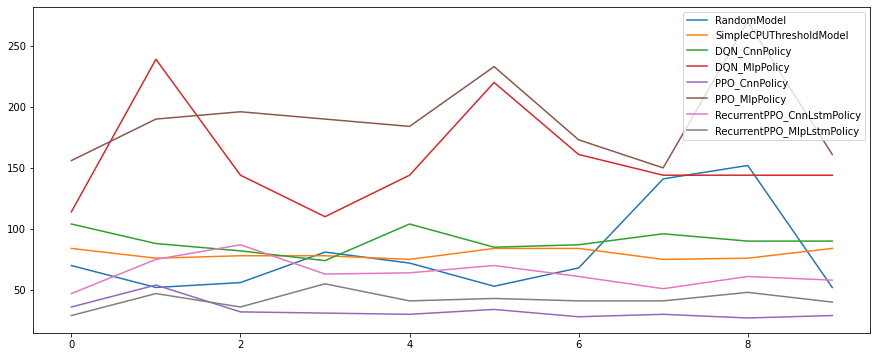

In [184]:
plt.figure(figsize=(15, 6))
plt.plot(episode_lengths)
plt.legend([col.replace('episode_lenghts_', '') for col in episode_lengths.columns])
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# MLP POLICY

X = np.load(f'{BASE_PATH}/observations/observations_ppo_MlpPolicy_1.npy')
X = np.squeeze(X, axis=1)
df_ppo = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)

X = np.load(f'{BASE_PATH}/observations/observations_recurrentppo_MlpLstmPolicy_1.npy')
X = np.squeeze(X, axis=1)
df_recurrent_ppo = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)

X = np.load(f'{BASE_PATH}/observations/observations_simplecputhresholdmodel_SimpleCPUThresholdModel_1.npy')
X = np.squeeze(X, axis=1)
df_cpu = pd.DataFrame(X, columns = Utils.FEATURE_NAMES)

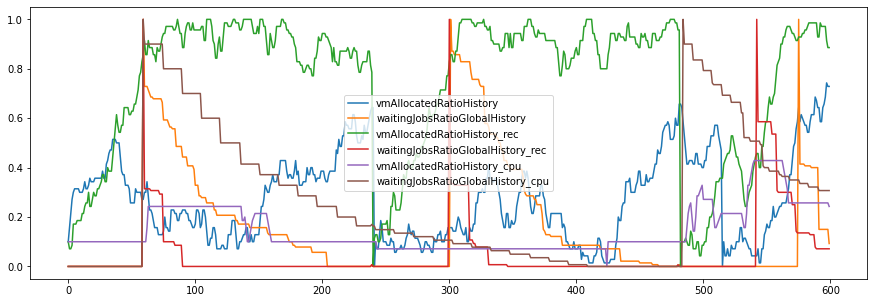

In [46]:
N_steps_start = 0
N_steps_stop = 600
from matplotlib.ticker import MaxNLocator

# columns = Utils.FEATURE_NAMES
columns = [
    'vmAllocatedRatioHistory', 
    # 'avgCPUUtilizationHistory', 
    'waitingJobsRatioGlobalHistory'
    ]
fig, host = plt.subplots(figsize=(15,5))
# par1 = host.twinx()
# par2 = host.twinx()
# host.set_xlabel("Steps")
# par1.set_ylabel("vmAllocatedRatioHistory")
# # par2.set_ylabel('avgCPUUtilizationHistory')
# host.set_ylabel("waitingJobsRatioGlobalHistory")
plt.plot(df_ppo[columns][N_steps_start:N_steps_stop])
plt.plot(df_recurrent_ppo[columns][N_steps_start:N_steps_stop])
plt.plot(df_cpu[columns][N_steps_start:N_steps_stop])
plt.legend(columns + [col+'_rec' for col in columns ] + [col+'_cpu' for col in columns ])
plt.show()